In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l1, l2
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization

In [2]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')

FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

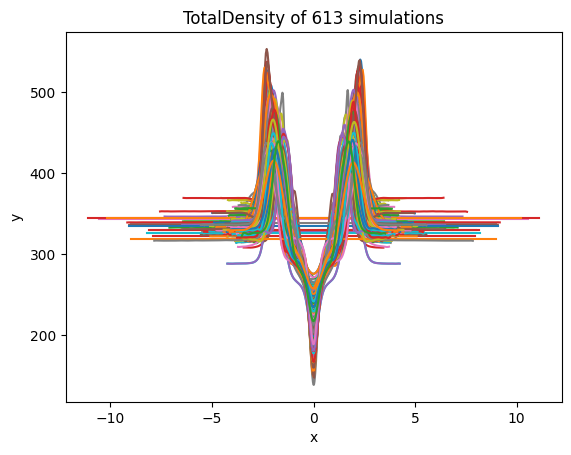

In [3]:
x_values_list = []
y_values_list = []
for i in range(0,613):
    plt.plot(TD_x_df[i], TD_y_df[i])
plt.xlabel('x')
plt.ylabel('y')
plt.title('TotalDensity of 613 simulations')
plt.show()

In [4]:
TD_y_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,333.204244,334.485664,340.298044,334.684611,332.848038,336.100431,351.842860,330.512511,337.266229,332.624183,...,329.131857,328.493013,338.053097,332.910187,336.384540,330.493742,328.922594,330.865940,329.636917,322.430402
1,333.566343,334.232327,340.249833,334.350987,333.289027,335.519065,350.935144,330.516524,337.318158,332.727117,...,329.797640,328.747349,338.117668,332.806640,336.822260,330.482033,329.448368,331.141939,329.756934,324.831431
2,333.731060,333.956931,340.185331,334.168397,333.446321,335.208764,350.600132,330.427115,337.477778,332.762805,...,329.878943,328.742041,338.130676,332.756829,336.838387,330.462405,329.307910,331.286935,329.805601,326.176001
3,333.822123,333.782696,340.138090,334.099749,333.444878,335.105242,350.630093,330.351033,337.613346,332.764355,...,329.660162,328.538288,338.120790,332.805368,336.754824,330.455435,328.968759,331.357395,329.813347,326.721055
4,333.888462,333.739810,340.116558,334.106518,333.372566,335.141254,350.836216,330.334379,337.668212,332.753040,...,329.388288,328.196835,338.105252,332.922401,336.719547,330.466258,328.711676,331.378835,329.802678,326.715502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,333.778670,333.763426,340.186997,334.106887,333.289838,334.898850,350.553593,330.263046,337.618389,332.786905,...,329.196610,328.563470,338.087262,332.971975,336.809905,330.430037,329.568313,331.244414,329.786218,325.799012
196,333.729730,333.840736,340.251529,334.089817,333.339024,334.943515,350.389940,330.073637,337.514903,332.809683,...,329.381779,328.876883,338.073907,333.016986,336.999441,330.449168,329.557337,330.907225,329.802986,325.998720
197,333.669431,333.876643,340.287847,334.036981,333.398144,335.151591,350.177928,329.998734,337.359402,332.809623,...,329.401901,329.035338,338.069590,333.048410,337.091830,330.465254,329.381783,330.670172,329.805961,326.142870
198,333.544270,333.788974,340.219963,333.938143,333.428262,335.595932,349.928119,330.150935,337.176497,332.769615,...,329.039184,328.946697,338.087988,332.961431,336.840729,330.450025,328.951252,330.704654,329.773324,326.133732


In [3]:
for i in range(0,613):
    TD_y_df[i] = TD_y_df[i]-round((TD_y_df[i][0]+TD_y_df[i][199])/2,3)

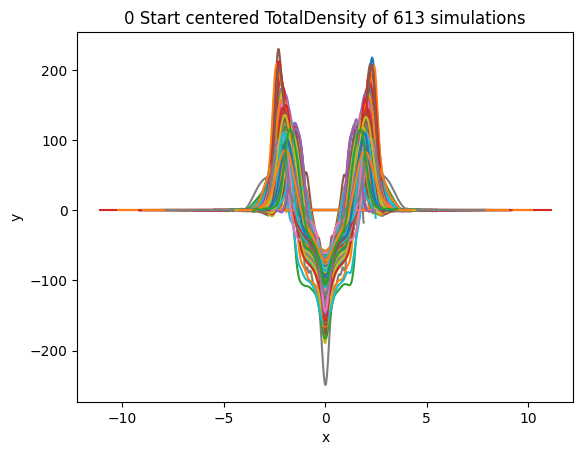

In [4]:
x_values_list = []
y_values_list = []
for i in range(0,613):
    plt.plot(TD_x_df[i], TD_y_df[i])
plt.xlabel('x')
plt.ylabel('y')
plt.title('0 Start centered TotalDensity of 613 simulations')
plt.show()

In [38]:
TD_y_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,-0.023756,0.514664,0.184044,0.452611,-0.253962,-0.126569,1.101860,-0.061489,0.122229,-0.020817,...,0.603857,-0.000987,-0.045903,0.175187,0.243540,0.071742,0.399594,-0.153060,-0.019083,-1.707598
1,0.338343,0.261327,0.135833,0.118987,0.187027,-0.707935,0.194144,-0.057476,0.174158,0.082117,...,1.269640,0.253349,0.018668,0.071640,0.681260,0.060033,0.925368,0.122939,0.100934,0.693431
2,0.503060,-0.014069,0.071331,-0.063603,0.344321,-1.018236,-0.140868,-0.146885,0.333778,0.117805,...,1.350943,0.248041,0.031676,0.021829,0.697387,0.040405,0.784910,0.267935,0.149601,2.038001
3,0.594123,-0.188304,0.024090,-0.132251,0.342878,-1.121758,-0.110907,-0.222967,0.469346,0.119355,...,1.132162,0.044288,0.021790,0.070368,0.613824,0.033435,0.445759,0.338395,0.157347,2.583055
4,0.660462,-0.231190,0.002558,-0.125482,0.270566,-1.085746,0.095216,-0.239621,0.524212,0.108040,...,0.860288,-0.297165,0.006252,0.187401,0.578547,0.044258,0.188676,0.359835,0.146678,2.577502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.550670,-0.207574,0.072997,-0.125113,0.187838,-1.328150,-0.187407,-0.310954,0.474389,0.141905,...,0.668610,0.069470,-0.011738,0.236975,0.668905,0.008037,1.045313,0.225414,0.130218,1.661012
196,0.501730,-0.130264,0.137529,-0.142183,0.237024,-1.283485,-0.351060,-0.500363,0.370903,0.164683,...,0.853779,0.382883,-0.025093,0.281986,0.858441,0.027168,1.034337,-0.111775,0.146986,1.860720
197,0.441431,-0.094357,0.173847,-0.195019,0.296144,-1.075409,-0.563072,-0.575266,0.215402,0.164623,...,0.873901,0.541338,-0.029410,0.313410,0.950830,0.043254,0.858783,-0.348828,0.149961,2.004870
198,0.316270,-0.182026,0.105963,-0.293857,0.326262,-0.631068,-0.812881,-0.423065,0.032497,0.124615,...,0.511184,0.452697,-0.011012,0.226431,0.699729,0.028025,0.428252,-0.314346,0.117324,1.995732


In [4]:
FF_df = (FF_df-FF_df.mean())/FF_df.std()
TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()

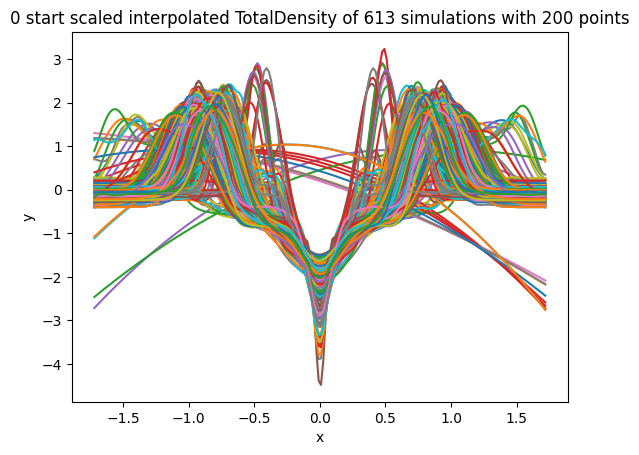

In [6]:
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('0 start scaled interpolated TotalDensity of 613 simulations with 200 points')
plt.show()


[10, 16, 24, 32, 34, 37, 43, 78, 82, 89, 118, 221, 252, 261, 277, 303, 311, 353, 364, 387, 419, 430, 551, 583]


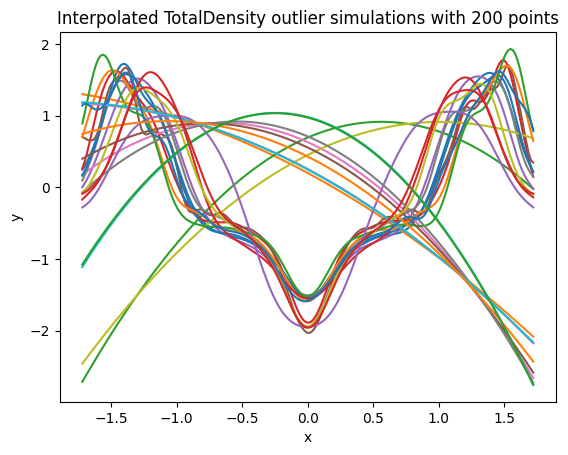

In [5]:
outlier_column_indexes = set([])

index = 0
for value in TD_y_df.iloc[99]:
    if value > -1:
        #print(index)
        outlier_column_indexes.add(index)
    index = index + 1

print('')
index = 0 
for value in TD_y_df.iloc[5]:
    if value > 0.30:
        outlier_column_indexes.add(index)
    index = index + 1
    
index = 0 
for value in TD_y_df.iloc[15]:
    if value > 0.30:
        outlier_column_indexes.add(index)
    index = index + 1
    
#index = 0 
#for value in TD_y_df.iloc[75]:
#    if value > 2:
#        outlier_column_indexes.add(index)
#    index = index + 1
    
print(sorted(list(outlier_column_indexes)))
    
for index in sorted(list(outlier_column_indexes)):
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity outlier simulations with 200 points')
plt.show()

In [6]:
FF_df = FF_df.drop(outlier_column_indexes, axis=1)
TD_x_df = TD_x_df.drop(outlier_column_indexes, axis=1)
TD_y_df = TD_y_df.drop(outlier_column_indexes, axis=1)

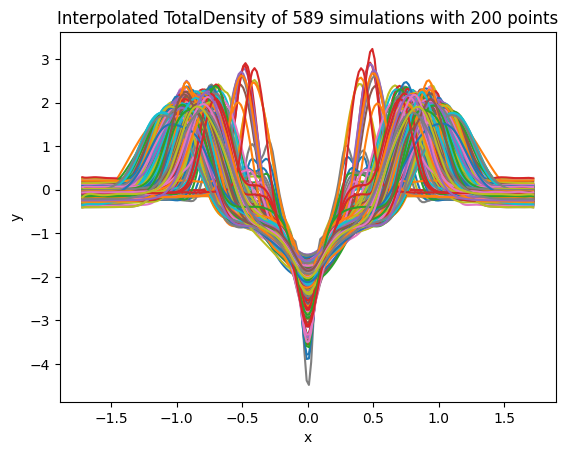

In [9]:
i = 0
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    i = i + 1
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of ' + str(i) + ' simulations with 200 points')
plt.show()

In [7]:
def loss(actual,prediction):
    length = int(len(prediction[0])/2)
    
    index = 0
    distance_average_sum = 0
    for data in prediction:
        p_x = data[0:length]
        p_y = data[length:]
        t_x = actual[index][0:length]
        t_y = actual[index][length:]
         
        distance_sum = 0
        for i in range(0,length):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)
            
        distance_average_sum = distance_average_sum + distance_sum/length
        index = index + 1
        
    return (distance_average_sum)/len(prediction)

def plots(actual,prediction):
    random.seed(42)
    train = random.sample(range(0,len(test_input_values)),10)
    for number in train:
        length = int(len(prediction[0])/2)
        x_1 = prediction[number][0:length]
        y_1 = prediction[number][length:]
        plt.plot(x_1,y_1,c='b')

        x_2 = test_output_values[number][0:length]
        y_2 = test_output_values[number][length:]
        plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the ten random predictions |blue| against actual |red|')
    plt.show() 
    
    index = 0
    for points in prediction:
        p_x = points[0:length]
        p_y = points[length:]
        plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
        t_x = test_output_values[index][0:length].tolist()
        t_y = test_output_values[index][length:].tolist()
        plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
        index = index + 1

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction |blue| and actual |red| data')
    plt.show()
    
    number = 10
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 75
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show() 
    
    number = 80
    prediction = model.predict(test_input_values)
    length = int(len(prediction[0])/2)
    x_1 = prediction[number][0:length]
    y_1 = prediction[number][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = actual[number][0:length]
    y_2 = actual[number][length:]
    plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
    plt.show()
    
def training_loss(true, pred):
    row_length = int(tf.shape(true)[1]/2)
    column_length = int(tf.shape(true)[0])
    
    p_x = tf.cast(pred[:, 0:row_length], tf.float32)
    p_y = tf.cast(pred[:, row_length:], tf.float32)
    t_x = tf.cast(true[:, 0:row_length], tf.float32)
    t_y = tf.cast(true[:, row_length:], tf.float32)
    
    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = tf.sqrt(distance_squared)
    distance_sum = tf.reduce_sum(distance, axis=-1)
    distance_average = tf.reduce_mean(distance_sum)
    
    return distance_average / tf.cast(tf.shape(true)[0], tf.float32)

In [8]:
names = []
for i in TD_x_df.columns:
    names.append(str(i) + 'x')
    names.append(str(i) + 'y')

TD_df = pd.DataFrame(index=range(200),columns=[names])

for i in TD_x_df.columns:
    x_value = []
    y_value = []
    for value in TD_x_df[i]:
        x_value.append(value)
    for value in TD_y_df[i]:
        y_value.append(value)
    
    TD_df[str(i) + 'x'] = x_value
    TD_df[str(i) + 'y'] = y_value
    
TD_df

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,608x,608y,609x,609y,610x,610y,611x,611y,612x,612y
0,-1.719098,-0.292967,-1.719098,-0.043943,-1.719098,-0.158113,-1.719098,-0.101767,-1.719098,-0.074313,...,-1.719098,-0.245502,-1.719098,-0.061689,-1.719098,-0.065606,-1.719098,-0.220929,-1.719098,-0.171157
1,-1.701821,-0.287719,-1.701821,-0.048955,-1.701821,-0.158903,-1.701821,-0.108930,-1.701821,-0.065830,...,-1.701821,-0.245715,-1.701821,-0.050817,-1.701821,-0.060005,-1.701821,-0.218079,-1.701821,-0.128594
2,-1.684543,-0.285331,-1.684543,-0.054403,-1.684543,-0.159960,-1.684543,-0.112849,-1.684543,-0.062805,...,-1.684543,-0.246071,-1.684543,-0.053721,-1.684543,-0.057062,-1.684543,-0.216923,-1.684543,-0.104758
3,-1.667266,-0.284011,-1.667266,-0.057850,-1.667266,-0.160734,-1.667266,-0.114323,-1.667266,-0.062832,...,-1.667266,-0.246198,-1.667266,-0.060734,-1.667266,-0.055632,-1.667266,-0.216739,-1.667266,-0.095096
4,-1.649989,-0.283050,-1.649989,-0.058699,-1.649989,-0.161087,-1.649989,-0.114178,-1.649989,-0.064223,...,-1.649989,-0.246001,-1.649989,-0.066050,-1.649989,-0.055196,-1.649989,-0.216993,-1.649989,-0.095194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.649989,-0.284641,1.649989,-0.058231,1.649989,-0.159933,1.649989,-0.114170,1.649989,-0.065815,...,1.649989,-0.246660,1.649989,-0.048337,1.649989,-0.057925,1.649989,-0.217384,1.649989,-0.111441
196,1.667266,-0.285351,1.667266,-0.056702,1.667266,-0.158876,1.667266,-0.114536,1.667266,-0.064869,...,1.667266,-0.246312,1.667266,-0.048564,1.667266,-0.064769,1.667266,-0.216985,1.667266,-0.107901
197,1.684543,-0.286225,1.684543,-0.055992,1.684543,-0.158280,1.684543,-0.115670,1.684543,-0.063731,...,1.684543,-0.246020,1.684543,-0.052194,1.684543,-0.069580,1.684543,-0.216915,1.684543,-0.105345
198,1.701821,-0.288039,1.701821,-0.057726,1.701821,-0.159393,1.701821,-0.117792,1.701821,-0.063152,...,1.701821,-0.246297,1.701821,-0.061096,1.701821,-0.068880,1.701821,-0.217690,1.701821,-0.105507


In [9]:
input_data = FF_df.iloc[: , :-14]
output_data = TD_df.iloc[: , :-28]

In [18]:
input_data

,0,1,2,3,4,5,6,7,8,9,...,589,590,591,592,593,594,595,596,597,598
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.537854,-0.345675,-0.635462,-0.711578,0.048040,-0.321485,0.954038,-0.671184,-0.170736,-0.112200
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.538258,-0.346067,-0.635859,-0.711196,0.047498,-0.321904,0.953268,-0.671651,-0.171363,-0.112708
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.539469,-0.347245,-0.637050,-0.710050,0.045873,-0.323160,0.950959,-0.673053,-0.173246,-0.114231
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.541488,-0.349207,-0.639033,-0.708140,0.043164,-0.325254,0.947112,-0.675387,-0.176383,-0.116770
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.544312,-0.351953,-0.641809,-0.705467,0.039373,-0.328185,0.941730,-0.678654,-0.180771,-0.120322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.748329,-0.706715,-0.756919,-0.767718,-0.697094,-0.682520,-0.714481,-0.655735,-0.748767,-0.792347
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.749191,-0.706998,-0.755730,-0.766618,-0.699303,-0.682503,-0.720644,-0.655795,-0.750661,-0.792153
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.750055,-0.707287,-0.754544,-0.765530,-0.701556,-0.682487,-0.726844,-0.655902,-0.752505,-0.791958
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.750920,-0.707582,-0.753362,-0.764456,-0.703852,-0.682471,-0.733076,-0.656056,-0.754297,-0.791761


In [15]:
output_data

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,594x,594y,595x,595y,596x,596y,597x,597y,598x,598y
0,-1.719098,-0.292967,-1.719098,-0.043943,-1.719098,-0.158113,-1.719098,-0.101767,-1.719098,-0.074313,...,-1.719098,-0.062344,-1.719098,-0.270691,-1.719098,-0.002047,-1.719098,-0.099095,-1.719098,-0.139178
1,-1.701821,-0.287719,-1.701821,-0.048955,-1.701821,-0.158903,-1.701821,-0.108930,-1.701821,-0.065830,...,-1.701821,-0.062070,-1.701821,-0.273298,-1.701821,-0.022473,-1.701821,-0.082595,-1.701821,-0.133773
2,-1.684543,-0.285331,-1.684543,-0.054403,-1.684543,-0.159960,-1.684543,-0.112849,-1.684543,-0.062805,...,-1.684543,-0.061851,-1.684543,-0.274642,-1.684543,-0.029363,-1.684543,-0.079013,-1.684543,-0.129773
3,-1.667266,-0.284011,-1.667266,-0.057850,-1.667266,-0.160734,-1.667266,-0.114323,-1.667266,-0.062832,...,-1.667266,-0.061529,-1.667266,-0.274039,-1.667266,-0.028395,-1.667266,-0.081372,-1.667266,-0.126004
4,-1.649989,-0.283050,-1.649989,-0.058699,-1.649989,-0.161087,-1.649989,-0.114178,-1.649989,-0.064223,...,-1.649989,-0.061036,-1.649989,-0.272822,-1.649989,-0.024235,-1.649989,-0.085196,-1.649989,-0.121788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.649989,-0.284641,1.649989,-0.058231,1.649989,-0.159933,1.649989,-0.114170,1.649989,-0.065815,...,1.649989,-0.060007,1.649989,-0.279405,1.649989,-0.017878,1.649989,-0.076586,1.649989,-0.125101
196,1.667266,-0.285351,1.667266,-0.056702,1.667266,-0.158876,1.667266,-0.114536,1.667266,-0.064869,...,1.667266,-0.060677,1.667266,-0.279060,1.667266,-0.019374,1.667266,-0.078659,1.667266,-0.128852
197,1.684543,-0.286225,1.684543,-0.055992,1.684543,-0.158280,1.684543,-0.115670,1.684543,-0.063731,...,1.684543,-0.061635,1.684543,-0.274278,1.684543,-0.024392,1.684543,-0.083407,1.684543,-0.130898
198,1.701821,-0.288039,1.701821,-0.057726,1.701821,-0.159393,1.701821,-0.117792,1.701821,-0.063152,...,1.701821,-0.063133,1.701821,-0.269333,1.701821,-0.034243,1.701821,-0.089971,1.701821,-0.131230


In [10]:
column_index = []
for i in input_data.columns:
    column_index.append(i)

random.seed(42)
train = random.sample(column_index,460)
test = []
for number in column_index:
    if not number in train:
        test.append(number)

print(train)
print(test)

[125, 28, 296, 264, 240, 153, 114, 581, 99, 454, 38, 35, 105, 235, 250, 539, 30, 214, 451, 237, 481, 299, 6, 174, 589, 367, 576, 170, 232, 362, 592, 104, 409, 109, 386, 371, 285, 51, 492, 138, 407, 90, 317, 390, 207, 79, 53, 245, 313, 91, 584, 113, 565, 571, 486, 393, 177, 399, 382, 226, 288, 81, 186, 595, 93, 248, 205, 149, 528, 495, 344, 562, 300, 123, 369, 540, 453, 413, 417, 31, 128, 442, 18, 434, 172, 216, 148, 39, 119, 489, 504, 306, 470, 563, 512, 508, 352, 269, 213, 474, 490, 346, 246, 535, 146, 552, 137, 401, 302, 290, 145, 402, 316, 231, 577, 315, 215, 196, 523, 77, 274, 266, 550, 406, 27, 462, 63, 87, 338, 547, 426, 572, 228, 322, 588, 208, 206, 463, 251, 561, 139, 298, 5, 465, 389, 65, 368, 289, 404, 147, 519, 345, 185, 64, 161, 234, 556, 244, 1, 452, 388, 542, 270, 410, 101, 273, 61, 337, 163, 526, 431, 328, 111, 469, 202, 433, 92, 291, 286, 0, 323, 176, 533, 9, 443, 479, 168, 133, 33, 134, 505, 47, 50, 394, 262, 41, 287, 71, 72, 355, 256, 596, 94, 559, 457, 327, 464, 501,

In [11]:
train_input_values = []
for number in train:
    train_input_values.append(input_data[number])
    
train_output_values = []
for number in train:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    train_output_values.append(np.concatenate((list_1,list_2)))

test_input_values = []
for number in test:
    test_input_values.append(input_data[number])
    
test_output_values = []
for number in test:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    test_output_values.append(np.concatenate((list_1,list_2)))
    
train_input_values = np.array(train_input_values).astype(np.float32)
train_output_values = np.array(train_output_values).astype(np.float32)
test_input_values = np.array(test_input_values).astype(np.float32)
test_output_values = np.array(test_output_values).astype(np.float32)

print(train_input_values.shape)
print(train_output_values.shape)
print(test_input_values.shape)
print(test_output_values.shape)

(460, 1000)
(460, 400, 1)
(115, 1000)
(115, 400, 1)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 2000)              2002000   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0     

Epoch 60/1500
19/19 [==============================] - 2s 105ms/step - loss: 0.1072 - val_loss: 0.1215
Epoch 61/1500
19/19 [==============================] - 3s 166ms/step - loss: 0.1047 - val_loss: 0.1154
Epoch 62/1500
19/19 [==============================] - 3s 157ms/step - loss: 0.1044 - val_loss: 0.1201
Epoch 63/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.1038 - val_loss: 0.1257
Epoch 64/1500
19/19 [==============================] - 2s 104ms/step - loss: 0.1059 - val_loss: 0.1166
Epoch 65/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.1048 - val_loss: 0.1135
Epoch 66/1500
19/19 [==============================] - 2s 98ms/step - loss: 0.1029 - val_loss: 0.1186
Epoch 67/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.1037 - val_loss: 0.1187
Epoch 68/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0995 - val_loss: 0.1233
Epoch 69/1500
19/19 [==============================] - 2s 99ms/step - loss

19/19 [==============================] - 2s 102ms/step - loss: 0.0728 - val_loss: 0.1005
Epoch 219/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0737 - val_loss: 0.1008
Epoch 220/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0760 - val_loss: 0.1022
Epoch 221/1500
19/19 [==============================] - 3s 166ms/step - loss: 0.0761 - val_loss: 0.1041
Epoch 222/1500
19/19 [==============================] - 2s 104ms/step - loss: 0.0738 - val_loss: 0.1033
Epoch 223/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0791 - val_loss: 0.1000
Epoch 224/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0773 - val_loss: 0.1055
Epoch 225/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.0721 - val_loss: 0.1029
Epoch 226/1500
19/19 [==============================] - 2s 105ms/step - loss: 0.0735 - val_loss: 0.1062
Epoch 227/1500
19/19 [==============================] - 2s 105ms/step - loss: 0

Epoch 297/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0643 - val_loss: 0.0985
Epoch 298/1500
19/19 [==============================] - 2s 98ms/step - loss: 0.0665 - val_loss: 0.0935
Epoch 299/1500
19/19 [==============================] - 2s 105ms/step - loss: 0.0675 - val_loss: 0.1036
Epoch 300/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0657 - val_loss: 0.0986
Epoch 301/1500
19/19 [==============================] - 3s 166ms/step - loss: 0.0662 - val_loss: 0.0964
Epoch 302/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0682 - val_loss: 0.1033
Epoch 303/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0614 - val_loss: 0.1058
Epoch 304/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0635 - val_loss: 0.0962
Epoch 305/1500
19/19 [==============================] - 2s 105ms/step - loss: 0.0632 - val_loss: 0.1051
Epoch 306/1500
19/19 [==============================] - 2s 105ms/

Epoch 376/1500
19/19 [==============================] - 2s 99ms/step - loss: 0.0602 - val_loss: 0.1020
Epoch 377/1500
19/19 [==============================] - 2s 104ms/step - loss: 0.0655 - val_loss: 0.1122
Epoch 378/1500
19/19 [==============================] - 2s 99ms/step - loss: 0.0697 - val_loss: 0.1050
Epoch 379/1500
19/19 [==============================] - 2s 98ms/step - loss: 0.0636 - val_loss: 0.1007
Epoch 380/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.0600 - val_loss: 0.1048
Epoch 381/1500
19/19 [==============================] - 3s 164ms/step - loss: 0.0600 - val_loss: 0.0987
Epoch 382/1500
19/19 [==============================] - 2s 105ms/step - loss: 0.0569 - val_loss: 0.1007
Epoch 383/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.0577 - val_loss: 0.0911
Epoch 384/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0612 - val_loss: 0.0988
Epoch 385/1500
19/19 [==============================] - 2s 102ms/st

Epoch 455/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0545 - val_loss: 0.1006
Epoch 456/1500
19/19 [==============================] - 2s 104ms/step - loss: 0.0523 - val_loss: 0.0977
Epoch 457/1500
19/19 [==============================] - 2s 101ms/step - loss: 0.0548 - val_loss: 0.1038
Epoch 458/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0556 - val_loss: 0.1016
Epoch 459/1500
19/19 [==============================] - 2s 104ms/step - loss: 0.0592 - val_loss: 0.0964
Epoch 460/1500
19/19 [==============================] - 2s 99ms/step - loss: 0.0596 - val_loss: 0.0997
Epoch 461/1500
19/19 [==============================] - 3s 164ms/step - loss: 0.0555 - val_loss: 0.0943
Epoch 462/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0546 - val_loss: 0.0952
Epoch 463/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0577 - val_loss: 0.1029
Epoch 464/1500
19/19 [==============================] - 2s 103ms/

Epoch 534/1500
19/19 [==============================] - 2s 104ms/step - loss: 0.0537 - val_loss: 0.0995
Epoch 535/1500
19/19 [==============================] - 2s 97ms/step - loss: 0.0540 - val_loss: 0.1009
Epoch 536/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.0548 - val_loss: 0.1005
Epoch 537/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0546 - val_loss: 0.0983
Epoch 538/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.0514 - val_loss: 0.0971
Epoch 539/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0512 - val_loss: 0.0969
Epoch 540/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.0489 - val_loss: 0.1022
Epoch 541/1500
19/19 [==============================] - 3s 176ms/step - loss: 0.0838 - val_loss: 0.1059
Epoch 542/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0855 - val_loss: 0.1089
Epoch 543/1500
19/19 [==============================] - 2s 101ms/

Epoch 613/1500
19/19 [==============================] - 2s 106ms/step - loss: 0.0551 - val_loss: 0.1045
Epoch 614/1500
19/19 [==============================] - 2s 98ms/step - loss: 0.0501 - val_loss: 0.0977
Epoch 615/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.0514 - val_loss: 0.0931
Epoch 616/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0554 - val_loss: 0.1037
Epoch 617/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0550 - val_loss: 0.0996
Epoch 618/1500
19/19 [==============================] - 2s 104ms/step - loss: 0.0542 - val_loss: 0.0939
Epoch 619/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0494 - val_loss: 0.0994
Epoch 620/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.0541 - val_loss: 0.1053
Epoch 621/1500
19/19 [==============================] - 3s 165ms/step - loss: 0.0589 - val_loss: 0.0934
Epoch 622/1500
19/19 [==============================] - 2s 102ms/

Epoch 692/1500
19/19 [==============================] - 2s 98ms/step - loss: 0.0495 - val_loss: 0.0995
Epoch 693/1500
19/19 [==============================] - 2s 97ms/step - loss: 0.0459 - val_loss: 0.1049
Epoch 694/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0439 - val_loss: 0.1088
Epoch 695/1500
19/19 [==============================] - 2s 99ms/step - loss: 0.0495 - val_loss: 0.1047
Epoch 696/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0479 - val_loss: 0.1048
Epoch 697/1500
19/19 [==============================] - 3s 155ms/step - loss: 0.0511 - val_loss: 0.0991
Epoch 698/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.0493 - val_loss: 0.1014
Epoch 699/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0472 - val_loss: 0.0868
Epoch 700/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0473 - val_loss: 0.0991
Epoch 701/1500
19/19 [==============================] - 3s 158ms/st

Epoch 771/1500
19/19 [==============================] - 3s 178ms/step - loss: 0.0419 - val_loss: 0.1019
Epoch 772/1500
19/19 [==============================] - 2s 104ms/step - loss: 0.0465 - val_loss: 0.0881
Epoch 773/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0452 - val_loss: 0.0969
Epoch 774/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.0433 - val_loss: 0.0982
Epoch 775/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.0463 - val_loss: 0.1058
Epoch 776/1500
19/19 [==============================] - 2s 103ms/step - loss: 0.0515 - val_loss: 0.0952
Epoch 777/1500
19/19 [==============================] - 2s 102ms/step - loss: 0.0464 - val_loss: 0.0991
Epoch 778/1500
19/19 [==============================] - 2s 99ms/step - loss: 0.0428 - val_loss: 0.1017
Epoch 779/1500
19/19 [==============================] - 2s 104ms/step - loss: 0.0465 - val_loss: 0.0929
Epoch 780/1500
19/19 [==============================] - 2s 98ms/s


4/4 [==============================] - 0s 9ms/step
Loss is:0.1662425445379138

4/4 [==============================] - 0s 9ms/step


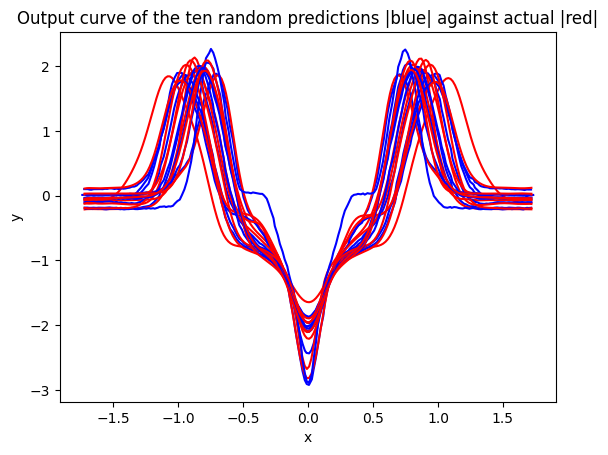

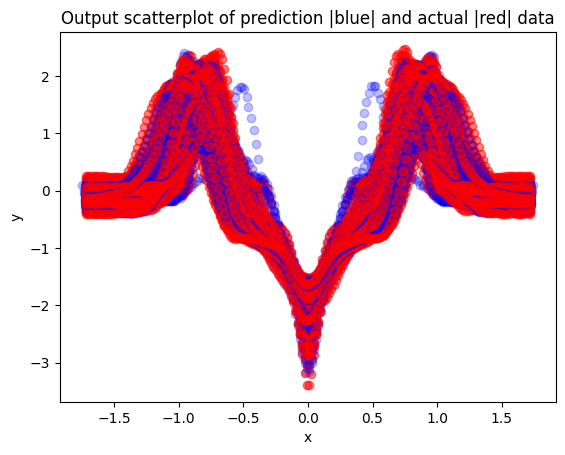

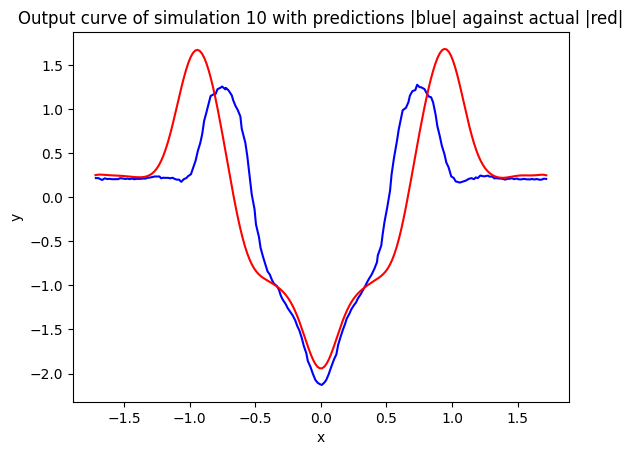

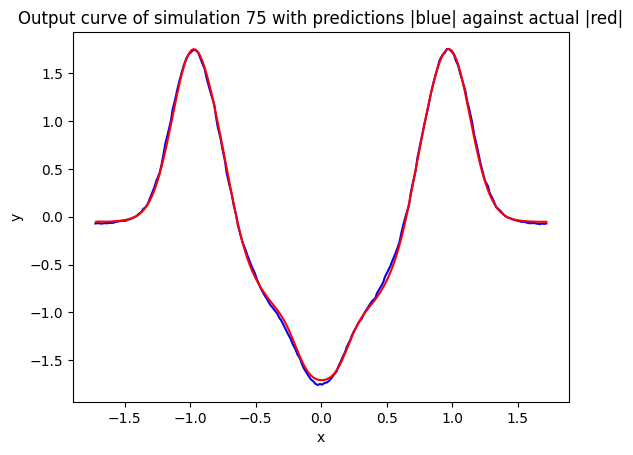

4/4 [==============================] - 0s 9ms/step


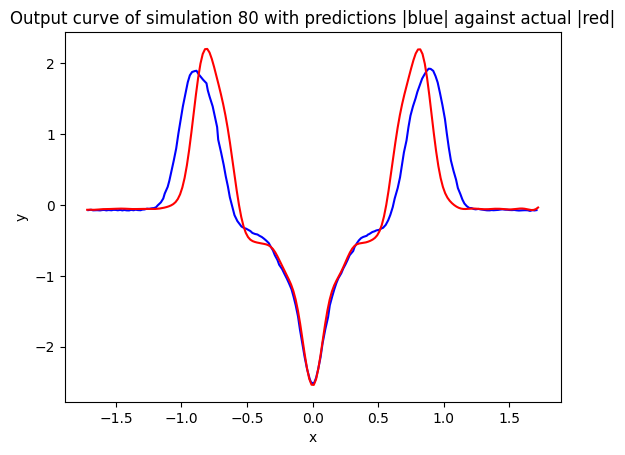

In [18]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_6_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=20, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_7 (Dense)             (None, 4000)              4004000   
                                                                 
 dropout_5 (Dropout)         (None, 4000)              0         
                                                                 
 dense_8 (Dense)             (None, 2000)              8002000   
                                                                 
 dropout_6 (Dropout)         (None, 2000)              0         
                                                                 
 dense_9 (Dense)             (None, 2000)              4002000   
                                                                 
 dropout_7 (Dropout)         (None, 2000)              0   

7/7 [==============================] - 6s 980ms/step - loss: 0.1554 - val_loss: 0.1384
Epoch 62/1500
7/7 [==============================] - 2s 350ms/step - loss: 0.1480 - val_loss: 0.1409
Epoch 63/1500
7/7 [==============================] - 2s 357ms/step - loss: 0.1465 - val_loss: 0.1499
Epoch 64/1500
7/7 [==============================] - 2s 356ms/step - loss: 0.1521 - val_loss: 0.1362
Epoch 65/1500
7/7 [==============================] - 2s 354ms/step - loss: 0.1475 - val_loss: 0.1380
Epoch 66/1500
7/7 [==============================] - 2s 352ms/step - loss: 0.1436 - val_loss: 0.1562
Epoch 67/1500
7/7 [==============================] - 2s 356ms/step - loss: 0.1489 - val_loss: 0.1331
Epoch 68/1500
7/7 [==============================] - 2s 338ms/step - loss: 0.1444 - val_loss: 0.1381
Epoch 69/1500
7/7 [==============================] - 2s 355ms/step - loss: 0.1438 - val_loss: 0.1485
Epoch 70/1500
7/7 [==============================] - 2s 349ms/step - loss: 0.1450 - val_loss: 0.1407
Epoc

Epoch 142/1500
7/7 [==============================] - 2s 355ms/step - loss: 0.1426 - val_loss: 0.1400
Epoch 143/1500
7/7 [==============================] - 2s 351ms/step - loss: 0.1435 - val_loss: 0.1331
Epoch 144/1500
7/7 [==============================] - 2s 357ms/step - loss: 0.1413 - val_loss: 0.1393
Epoch 145/1500
7/7 [==============================] - 2s 360ms/step - loss: 0.1425 - val_loss: 0.1329
Epoch 146/1500
7/7 [==============================] - 2s 351ms/step - loss: 0.1386 - val_loss: 0.1346
Epoch 147/1500
7/7 [==============================] - 3s 366ms/step - loss: 0.1392 - val_loss: 0.1416
Epoch 148/1500
7/7 [==============================] - 2s 350ms/step - loss: 0.1419 - val_loss: 0.1393
Epoch 149/1500
7/7 [==============================] - 2s 364ms/step - loss: 0.1398 - val_loss: 0.1326
Epoch 150/1500
7/7 [==============================] - 2s 360ms/step - loss: 0.1399 - val_loss: 0.1315
Epoch 151/1500
7/7 [==============================] - 6s 993ms/step - loss: 0.1387

7/7 [==============================] - 2s 339ms/step - loss: 0.1236 - val_loss: 0.1293
Epoch 303/1500
7/7 [==============================] - 2s 357ms/step - loss: 0.1222 - val_loss: 0.1353
Epoch 304/1500
7/7 [==============================] - 3s 370ms/step - loss: 0.1199 - val_loss: 0.1296
Epoch 305/1500
7/7 [==============================] - 2s 350ms/step - loss: 0.1178 - val_loss: 0.1278
Epoch 306/1500
7/7 [==============================] - 3s 369ms/step - loss: 0.1154 - val_loss: 0.1256
Epoch 307/1500
7/7 [==============================] - 2s 351ms/step - loss: 0.1147 - val_loss: 0.1296
Epoch 308/1500
7/7 [==============================] - 2s 346ms/step - loss: 0.1147 - val_loss: 0.1259
Epoch 309/1500
7/7 [==============================] - 2s 359ms/step - loss: 0.1154 - val_loss: 0.1278
Epoch 310/1500
7/7 [==============================] - 2s 344ms/step - loss: 0.1172 - val_loss: 0.1257
Epoch 311/1500
7/7 [==============================] - 6s 992ms/step - loss: 0.1238 - val_loss: 0.

7/7 [==============================] - 3s 398ms/step - loss: 0.1074 - val_loss: 0.1237
Epoch 463/1500
7/7 [==============================] - 2s 345ms/step - loss: 0.1065 - val_loss: 0.1246
Epoch 464/1500
7/7 [==============================] - 2s 349ms/step - loss: 0.1053 - val_loss: 0.1268
Epoch 465/1500
7/7 [==============================] - 2s 358ms/step - loss: 0.1058 - val_loss: 0.1224
Epoch 466/1500
7/7 [==============================] - 2s 338ms/step - loss: 0.1056 - val_loss: 0.1221
Epoch 467/1500
7/7 [==============================] - 3s 366ms/step - loss: 0.1070 - val_loss: 0.1252
Epoch 468/1500
7/7 [==============================] - 2s 349ms/step - loss: 0.1055 - val_loss: 0.1214
Epoch 469/1500
7/7 [==============================] - 3s 367ms/step - loss: 0.1050 - val_loss: 0.1236
Epoch 470/1500
7/7 [==============================] - 3s 362ms/step - loss: 0.1077 - val_loss: 0.1236
Epoch 471/1500
7/7 [==============================] - 6s 988ms/step - loss: 0.1069 - val_loss: 0.

7/7 [==============================] - 2s 350ms/step - loss: 0.1062 - val_loss: 0.1270
Epoch 623/1500
7/7 [==============================] - 2s 360ms/step - loss: 0.1096 - val_loss: 0.1251
Epoch 624/1500
7/7 [==============================] - 2s 357ms/step - loss: 0.1062 - val_loss: 0.1272
Epoch 625/1500
7/7 [==============================] - 3s 377ms/step - loss: 0.1081 - val_loss: 0.1229
Epoch 626/1500
7/7 [==============================] - 2s 355ms/step - loss: 0.1094 - val_loss: 0.1230
Epoch 627/1500
7/7 [==============================] - 2s 357ms/step - loss: 0.1075 - val_loss: 0.1204
Epoch 628/1500
7/7 [==============================] - 4s 562ms/step - loss: 0.1077 - val_loss: 0.1237
Epoch 629/1500
7/7 [==============================] - 2s 353ms/step - loss: 0.1067 - val_loss: 0.1239
Epoch 630/1500
7/7 [==============================] - 2s 353ms/step - loss: 0.1068 - val_loss: 0.1236
Epoch 631/1500
7/7 [==============================] - 6s 983ms/step - loss: 0.1056 - val_loss: 0.

7/7 [==============================] - 2s 350ms/step - loss: 0.1010 - val_loss: 0.1219
Epoch 783/1500
7/7 [==============================] - 3s 379ms/step - loss: 0.1025 - val_loss: 0.1221
Epoch 784/1500
7/7 [==============================] - 2s 349ms/step - loss: 0.1016 - val_loss: 0.1233
Epoch 785/1500
7/7 [==============================] - 2s 341ms/step - loss: 0.1018 - val_loss: 0.1235
Epoch 786/1500
7/7 [==============================] - 2s 357ms/step - loss: 0.1018 - val_loss: 0.1245
Epoch 787/1500
7/7 [==============================] - 3s 375ms/step - loss: 0.1014 - val_loss: 0.1197
Epoch 788/1500
7/7 [==============================] - 3s 382ms/step - loss: 0.1034 - val_loss: 0.1238
Epoch 789/1500
7/7 [==============================] - 2s 359ms/step - loss: 0.1074 - val_loss: 0.1201
Epoch 790/1500
7/7 [==============================] - 2s 353ms/step - loss: 0.1042 - val_loss: 0.1211
Epoch 791/1500
7/7 [==============================] - 6s 976ms/step - loss: 0.1031 - val_loss: 0.

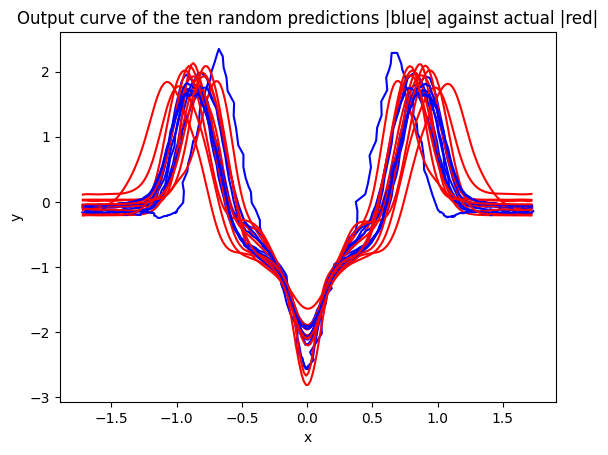

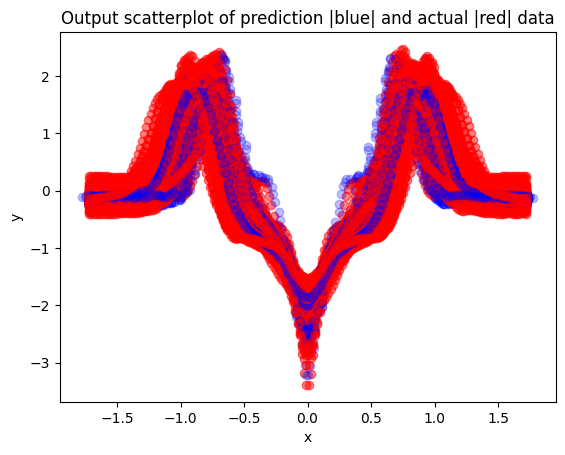

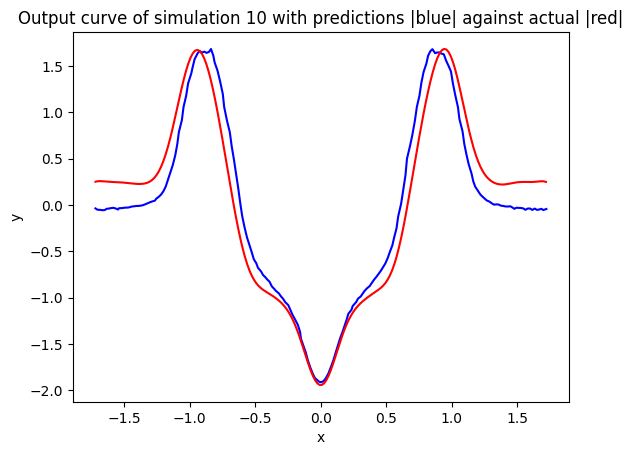

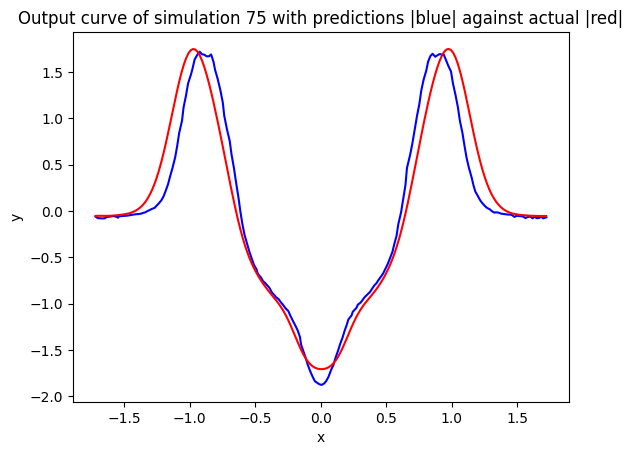

4/4 [==============================] - 0s 22ms/step


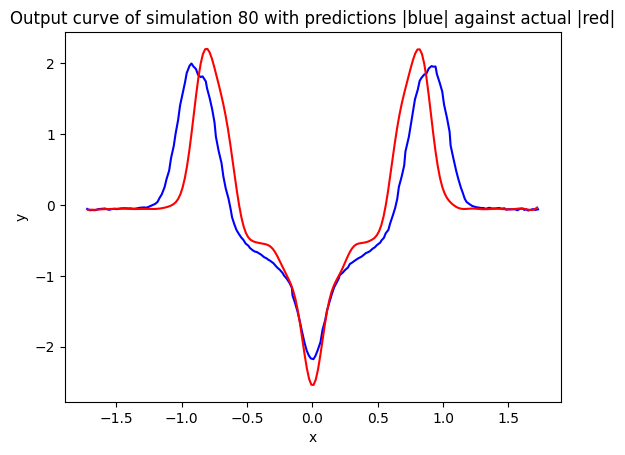

In [19]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(4000, activation="relu")(inputs)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(2000, activation="relu", bias_regularizer=l1(0.0001))(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(2000, activation="relu", bias_regularizer=l1(0.0001))(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(2000, activation="relu", bias_regularizer=l1(0.0001))(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(2000, activation="relu", bias_regularizer=l1(0.0001))(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu", bias_regularizer=l1(0.0001))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=250),
             TensorBoard(log_dir='model_6_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=61, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 400)               400400    
                                                                 
Total params: 2,402,400
Trainable params: 2,402,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
7/7 [==============================] - 5s 440ms/step - loss: 0.5182 - val_loss: 0.2315
Epoch 2/1500
7/7 [==============================] - 0s 52ms/step - loss: 0.2032 - v

7/7 [==============================] - 3s 419ms/step - loss: 0.0744 - val_loss: 0.1084
Epoch 155/1500
7/7 [==============================] - 1s 176ms/step - loss: 0.0771 - val_loss: 0.1212
Epoch 156/1500
7/7 [==============================] - 1s 157ms/step - loss: 0.0858 - val_loss: 0.1100
Epoch 157/1500
7/7 [==============================] - 1s 162ms/step - loss: 0.0816 - val_loss: 0.1112
Epoch 158/1500
7/7 [==============================] - 2s 305ms/step - loss: 0.0801 - val_loss: 0.1159
Epoch 159/1500
7/7 [==============================] - 1s 158ms/step - loss: 0.0768 - val_loss: 0.1086
Epoch 160/1500
7/7 [==============================] - 2s 253ms/step - loss: 0.0801 - val_loss: 0.1104
Epoch 161/1500
7/7 [==============================] - 2s 349ms/step - loss: 0.0769 - val_loss: 0.1085
Epoch 162/1500
7/7 [==============================] - 2s 310ms/step - loss: 0.0745 - val_loss: 0.1119
Epoch 163/1500
7/7 [==============================] - 1s 155ms/step - loss: 0.0766 - val_loss: 0.

Epoch 235/1500
7/7 [==============================] - 0s 52ms/step - loss: 0.0599 - val_loss: 0.1058
Epoch 236/1500
7/7 [==============================] - 0s 48ms/step - loss: 0.0643 - val_loss: 0.1015
Epoch 237/1500
7/7 [==============================] - 0s 52ms/step - loss: 0.0623 - val_loss: 0.1007
Epoch 238/1500
7/7 [==============================] - 0s 53ms/step - loss: 0.0623 - val_loss: 0.1038
Epoch 239/1500
7/7 [==============================] - 0s 50ms/step - loss: 0.0693 - val_loss: 0.1023
Epoch 240/1500
7/7 [==============================] - 2s 245ms/step - loss: 0.0652 - val_loss: 0.1015
Epoch 241/1500
7/7 [==============================] - 2s 300ms/step - loss: 0.0645 - val_loss: 0.1044
Epoch 242/1500
7/7 [==============================] - 0s 51ms/step - loss: 0.0635 - val_loss: 0.1022
Epoch 243/1500
7/7 [==============================] - 0s 48ms/step - loss: 0.0619 - val_loss: 0.1033
Epoch 244/1500
7/7 [==============================] - 0s 50ms/step - loss: 0.0618 - val_l

Epoch 316/1500
7/7 [==============================] - 0s 52ms/step - loss: 0.0571 - val_loss: 0.1037
Epoch 317/1500
7/7 [==============================] - 0s 51ms/step - loss: 0.0673 - val_loss: 0.1002
Epoch 318/1500
7/7 [==============================] - 0s 50ms/step - loss: 0.0601 - val_loss: 0.0983
Epoch 319/1500
7/7 [==============================] - 1s 218ms/step - loss: 0.0560 - val_loss: 0.0996
Epoch 320/1500
7/7 [==============================] - 0s 50ms/step - loss: 0.0550 - val_loss: 0.0992
Epoch 321/1500
7/7 [==============================] - 1s 110ms/step - loss: 0.0559 - val_loss: 0.1006
Epoch 322/1500
7/7 [==============================] - 1s 242ms/step - loss: 0.0545 - val_loss: 0.0967
Epoch 323/1500
7/7 [==============================] - 2s 317ms/step - loss: 0.0585 - val_loss: 0.1180
Epoch 324/1500
7/7 [==============================] - 0s 54ms/step - loss: 0.0645 - val_loss: 0.1049
Epoch 325/1500
7/7 [==============================] - 1s 186ms/step - loss: 0.0584 - va

Epoch 397/1500
7/7 [==============================] - 0s 52ms/step - loss: 0.0546 - val_loss: 0.0963
Epoch 398/1500
7/7 [==============================] - 1s 211ms/step - loss: 0.0564 - val_loss: 0.0987
Epoch 399/1500
7/7 [==============================] - 0s 50ms/step - loss: 0.0539 - val_loss: 0.0963
Epoch 400/1500
7/7 [==============================] - 0s 50ms/step - loss: 0.0532 - val_loss: 0.1010
Epoch 401/1500
7/7 [==============================] - 1s 233ms/step - loss: 0.0529 - val_loss: 0.1008
Epoch 402/1500
7/7 [==============================] - 0s 53ms/step - loss: 0.0547 - val_loss: 0.1030
Epoch 403/1500
7/7 [==============================] - 0s 48ms/step - loss: 0.0541 - val_loss: 0.0952
Epoch 404/1500
7/7 [==============================] - 0s 50ms/step - loss: 0.0522 - val_loss: 0.0985
Epoch 405/1500
7/7 [==============================] - 0s 50ms/step - loss: 0.0505 - val_loss: 0.0958
Epoch 406/1500
7/7 [==============================] - 0s 48ms/step - loss: 0.0498 - val_l

Epoch 558/1500
7/7 [==============================] - 2s 337ms/step - loss: 0.0442 - val_loss: 0.0940
Epoch 559/1500
7/7 [==============================] - 2s 248ms/step - loss: 0.0442 - val_loss: 0.0970
Epoch 560/1500
7/7 [==============================] - 2s 255ms/step - loss: 0.0437 - val_loss: 0.0931
Epoch 561/1500
7/7 [==============================] - 2s 296ms/step - loss: 0.0439 - val_loss: 0.0968
Epoch 562/1500
7/7 [==============================] - 1s 93ms/step - loss: 0.0436 - val_loss: 0.0969
Epoch 563/1500
7/7 [==============================] - 1s 114ms/step - loss: 0.0434 - val_loss: 0.0946
Epoch 564/1500
7/7 [==============================] - 1s 206ms/step - loss: 0.0431 - val_loss: 0.0953
Epoch 565/1500
7/7 [==============================] - 1s 216ms/step - loss: 0.0429 - val_loss: 0.0946
Epoch 566/1500
7/7 [==============================] - 1s 204ms/step - loss: 0.0423 - val_loss: 0.0908
Epoch 567/1500
7/7 [==============================] - 3s 477ms/step - loss: 0.0429 

Epoch 719/1500
7/7 [==============================] - 5s 892ms/step - loss: 0.0381 - val_loss: 0.0927
Epoch 720/1500
7/7 [==============================] - 1s 218ms/step - loss: 0.0365 - val_loss: 0.0944
Epoch 721/1500
7/7 [==============================] - 1s 122ms/step - loss: 0.0367 - val_loss: 0.0919
Epoch 722/1500
7/7 [==============================] - 0s 51ms/step - loss: 0.0345 - val_loss: 0.0906
Epoch 723/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0337 - val_loss: 0.0946
Epoch 724/1500
7/7 [==============================] - 0s 67ms/step - loss: 0.0381 - val_loss: 0.0943
Epoch 725/1500
7/7 [==============================] - 0s 49ms/step - loss: 0.0371 - val_loss: 0.0885
Epoch 726/1500
7/7 [==============================] - 0s 50ms/step - loss: 0.0385 - val_loss: 0.0957
Epoch 727/1500
7/7 [==============================] - 0s 51ms/step - loss: 0.0377 - val_loss: 0.0897
Epoch 728/1500
7/7 [==============================] - 0s 51ms/step - loss: 0.0376 - val_

Epoch 800/1500
7/7 [==============================] - 0s 48ms/step - loss: 0.0387 - val_loss: 0.0945
Epoch 801/1500
7/7 [==============================] - 1s 148ms/step - loss: 0.0357 - val_loss: 0.0916
Epoch 802/1500
7/7 [==============================] - 0s 49ms/step - loss: 0.0354 - val_loss: 0.0909
Epoch 803/1500
7/7 [==============================] - 0s 52ms/step - loss: 0.0346 - val_loss: 0.0930
Epoch 804/1500
7/7 [==============================] - 2s 331ms/step - loss: 0.0341 - val_loss: 0.0932
Epoch 805/1500
7/7 [==============================] - 2s 333ms/step - loss: 0.0350 - val_loss: 0.0934
Epoch 806/1500
7/7 [==============================] - 1s 236ms/step - loss: 0.0370 - val_loss: 0.0906
Epoch 807/1500
7/7 [==============================] - 2s 313ms/step - loss: 0.0370 - val_loss: 0.0897
Epoch 808/1500
7/7 [==============================] - 1s 242ms/step - loss: 0.0381 - val_loss: 0.0943
Epoch 809/1500
7/7 [==============================] - 1s 213ms/step - loss: 0.0389 - 

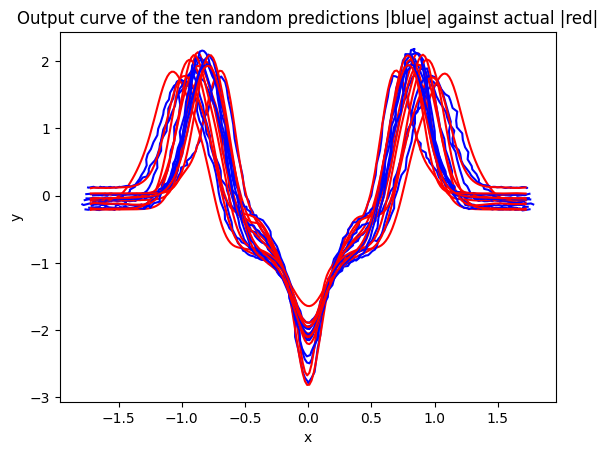

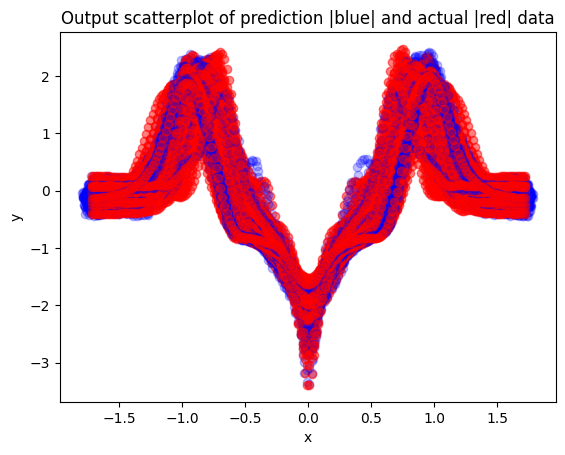

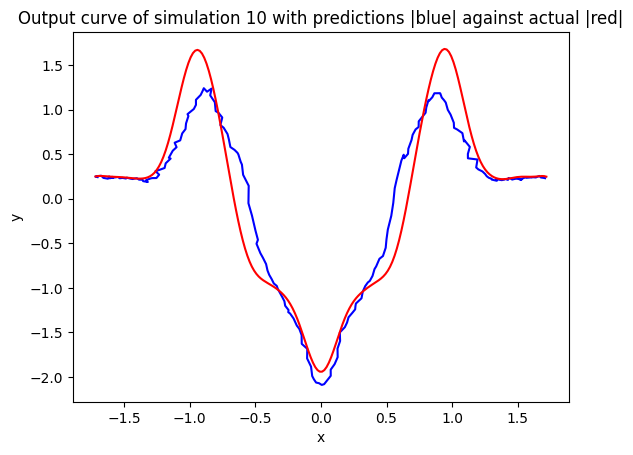

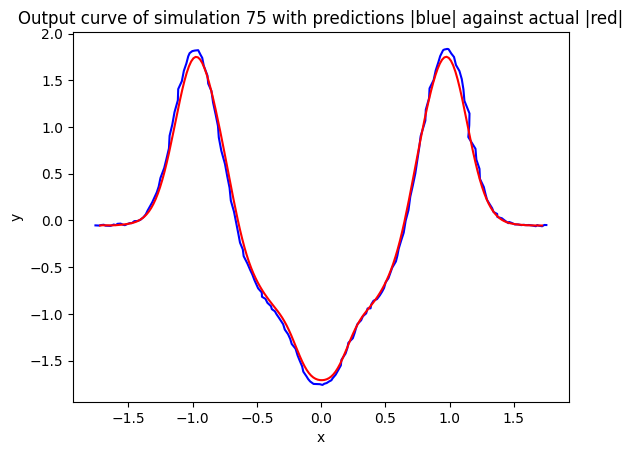

4/4 [==============================] - 0s 4ms/step


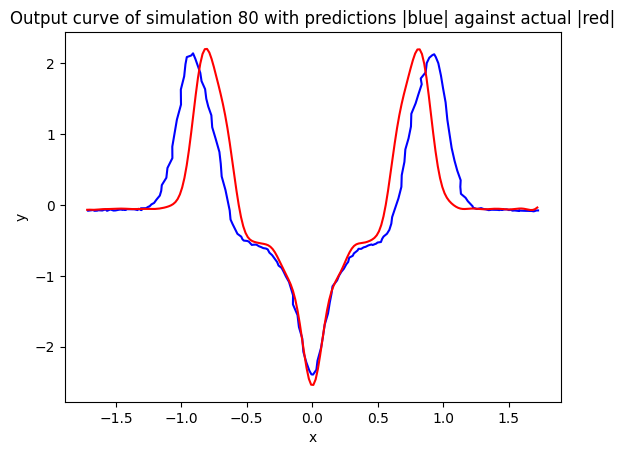

In [19]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(1000, activation="relu")(inputs)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_6_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=58, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

In [20]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(1000, activation="relu")(inputs)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_6_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=58, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_5 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_6 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_7 (Dense)             (None, 400)               400400    
                                                                 
Total params: 4,404,400
Trainable params: 4,404,400
Non-tra

Epoch 71/1500
7/7 [==============================] - 1s 184ms/step - loss: 0.0920 - val_loss: 0.1215
Epoch 72/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.0954 - val_loss: 0.1176
Epoch 73/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.0887 - val_loss: 0.1148
Epoch 74/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.0867 - val_loss: 0.1192
Epoch 75/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0883 - val_loss: 0.1212
Epoch 76/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.0936 - val_loss: 0.1209
Epoch 77/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.0967 - val_loss: 0.1398
Epoch 78/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.1060 - val_loss: 0.1306
Epoch 79/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.0952 - val_loss: 0.1457
Epoch 80/1500
7/7 [==============================] - 0s 74ms/step - loss: 0.1083 - val_loss: 0.1564